In [31]:
import pandas as pd

df = pd.read_excel (r'/home/mramanymous/Documents/DATA.xlsx')
df.tail()
df

,Date,Milk,Tea,Coffee,Onion,Yougurt,Bread,Catchup,Egg,Fish,SoftDrink,Rice
0,2018-01-01,1,1,1,1,1,1,1,1,1,0,0
1,2018-01-02,1,1,0,0,1,0,0,1,0,1,0
2,2018-01-03,1,1,0,1,0,1,0,0,0,1,0
3,2018-01-04,1,1,1,0,0,1,0,1,0,1,1
4,2018-01-05,1,1,1,1,1,1,0,1,1,0,1
5,2018-01-06,1,1,0,0,0,1,0,1,0,0,1
6,2018-01-07,1,1,1,1,0,1,1,0,1,0,0
7,2018-01-08,1,1,0,0,0,1,1,1,0,0,0
8,2018-01-09,1,1,0,0,0,0,1,0,0,0,1
9,2018-01-10,1,1,0,0,1,1,1,0,0,0,1


In [38]:
df["Rice"].split()

AttributeError: 'Series' object has no attribute 'split'

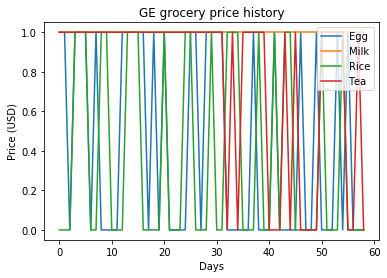

In [48]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(df["Egg"])
plt.plot(df["Milk"])
plt.plot(df["Rice"])
plt.plot(df["Tea"])
plt.title('GE grocery price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Egg','Milk','Rice','Tea'], loc='upper right')
plt.show()


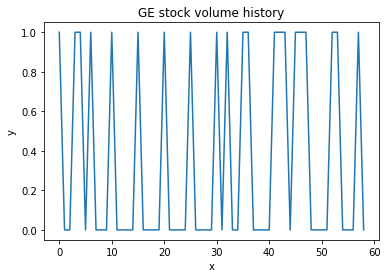

In [52]:
plt.figure()
plt.plot(df["Coffee"])
plt.title('GE stock volume history')
plt.ylabel('y')
plt.xlabel('x')
plt.show()


In [18]:
print("checking if any null values are present\n", df.isna().sum())

checking if any null values are present
 Date         0
Milk         0
Tea          0
Coffee       0
Onion        0
Yougurt      0
Bread        0
Catchup      0
Egg          0
Fish         0
SoftDrink    0
Rice         0
dtype: int64


In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

train_cols = ["Egg","Milk","Tea","Coffee","Rice"]
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)
print("Train and Test size", len(df_train), len(df_test))
# scale the feature MinMax, build array
x = df_train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(df_test.loc[:,train_cols])

Train and Test size 47 12


In [65]:
def build_timeseries(mat, y_col_index):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - 2
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, 2, dim_1))
    y = np.zeros((dim_0,))
    
    for i in tqdm_notebook(range(dim_0)):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[2+i, y_col_index]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y

In [66]:
def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [67]:
import numpy as np
x_t, y_t = build_timeseries(x_train, 3)
x_t = trim_dataset(x_t, BATCH_SIZE)
y_t = trim_dataset(y_t, BATCH_SIZE)
x_temp, y_temp = build_timeseries(x_test, 3)
x_val, x_test_t = np.split(trim_dataset(x_temp, BATCH_SIZE),2)
y_val, y_test_t = np.split(trim_dataset(y_temp, BATCH_SIZE),2)

NameError: name 'tqdm_notebook' is not defined

In [27]:
lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True,     kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))
optimizer = optimizers.RMSprop(lr=lr)
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)

NameError: name 'Sequential' is not defined

In [ ]:
csv_logger = CSVLogger(os.path.join(OUTPUT_PATH, 'your_log_name' + '.log'), append=True)

history = model.fit(x_t, y_t, epochs=your_epochs, verbose=2, batch_size=BATCH_SIZE,
                    shuffle=False, validation_data=(trim_dataset(x_val, BATCH_SIZE),
                    trim_dataset(y_val, BATCH_SIZE)), callbacks=[csv_logger])